In [1]:
#importing necessary libraries.
import numpy as np
import sklearn
from sklearn import *
import pandas as pd
import matplotlib.pyplot as plt
#function to sample only positive values from a guassian.
def posOnly(fi):
    correct=False
    val=0
    while(correct==False):
        a= np.random.normal(fi,1)
        if a>0:
            val=a
            correct=True
    return val        
#function to sample only negative values from a guassian.
def negOnly(fi):
    correct=False
    val=0
    while(correct==False):
        a= np.random.normal(fi,1)
        if a<0:
            val=a
            correct=True
    return val
# Square Exponential Kernel Function.
def sq_exp_kernel(X1, X2, l=1.0,v=1.0):
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return (np.add(v * np.exp((-0.5 / l**2) * sqdist),np.eye(X1.shape[0],X1.shape[0])*.00001))
#function to sample v.
def sample_v(f,c):
    beta_new = (2 + 0.5*(np.dot(np.dot((f.T),np.linalg.inv(c)),(f))))
    return (1/np.random.gamma(52, (1/beta_new)))

In [2]:
#create test data, uniform values between -1 and 1. 
s= np.random.uniform(-1,1,100).reshape(100,1)

In [3]:
#assigning targets to the test data.
target=[]
for i in s:
    if i>=0:
        target.append(1)
    else:
        target.append(0)
        import random
#based on targets, initialising auxiliary variables i.e z vector.
z=[]
for i in target:
    if i==1:
        z.append(random.uniform(0.01, 10))
    else:
        z.append(random.uniform(-10, 0))
zvec= np.array(np.zeros(100))
zvec=zvec.reshape((100,1))

In [4]:
#initialise v.
v= 1/np.random.gamma(2,0.5)

In [5]:
#lists to store the samples being generated.
flist=[]
zlist=[]
vlist=[]
n_samps=10000 #number of samples to take.
for i in range(n_samps):
    vlist.append(v) #add v to the vlist.
    cov = sq_exp_kernel(s,s,1,v) # compute covariance matrix with latest v using square exp kernel.
    fcov=np.linalg.inv(np.linalg.inv(cov) + np.eye(100,100)) #compute updated covariance for P(F|z,Y)
    fmean= np.dot(fcov,zvec) #compute updated mean vector for P(F|z,Y).
    f_samples=np.random.multivariate_normal(fmean.flatten(), fcov, 1).T #generate the samples for P(F|z,Y).
    flist.append(f_samples) #add the samples to flist.
    zz=np.zeros(100)
    for i in range(100):
        if target[i] == 0:
            val=negOnly(f_samples[i])#sample from the conditional P(z_i|f_i,Y=0).
            zvec[i]=val
            zz[i]=val
        else:
            val=posOnly(f_samples[i]) #sample from the conditional P(z_i|f_i,Y=1).
            zvec[i]=val
            zz[i]=val
    zlist.append(zz) #add z vector to the zlist.
    v = sample_v(f_samples,cov) #sample new v. 
    

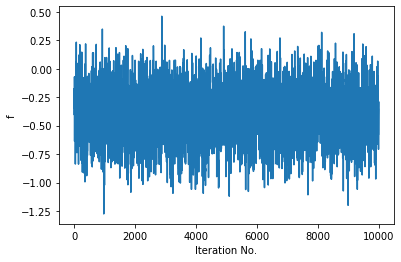

In [9]:
#plotting the traceplot for a given f
plt.plot(pd.DataFrame(np.array(flist).reshape(n_samps,100))[82])
plt.xlabel("Iteration No.")
plt.ylabel("f")
plt.show()

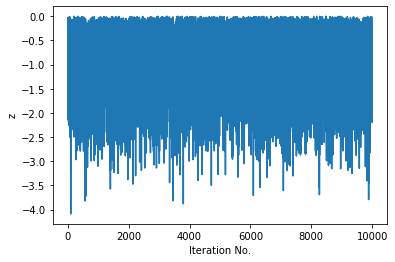

In [10]:
#plotting the traceplot for a given z
plt.plot(pd.DataFrame(np.array(zlist).reshape(n_samps,100))[82])
plt.xlabel("Iteration No.")
plt.ylabel("z")
plt.show()

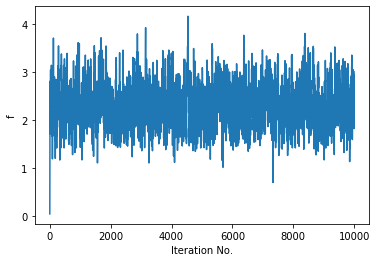

In [11]:
#plotting the traceplot for a given f
plt.plot(pd.DataFrame(np.array(flist).reshape(n_samps,100))[81])
plt.xlabel("Iteration No.")
plt.ylabel("f")
plt.show()

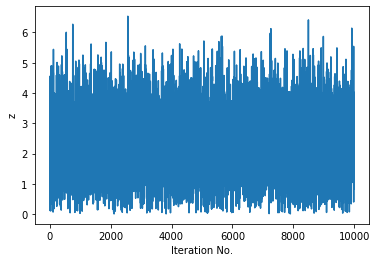

In [12]:
#plotting the traceplot for a given z
plt.plot(pd.DataFrame(np.array(zlist).reshape(n_samps,100))[81])
plt.xlabel("Iteration No.")
plt.ylabel("z")
plt.show()

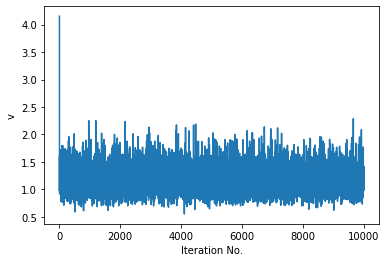

In [8]:
#plotting the traceplot for v
plt.plot(vlist)
plt.xlabel("Iteration No.")
plt.ylabel("v")
plt.show()